## **Урок 7. Многомерный статистический анализ. Линейная регрессия**

#### Задача 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного 
#### скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя
#### математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - 
#### признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с 
#### использованием intercept, так и без.

In [558]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [559]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [560]:
len(X)

10

In [561]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [562]:
len(y)

10

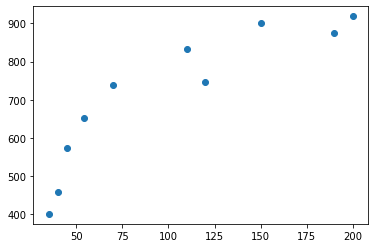

In [563]:
plt.scatter(X,y)
plt.show()

In [564]:
#данные распеределены нормально
stats.shapiro(X)

ShapiroResult(statistic=0.8886317610740662, pvalue=0.1636563241481781)

In [565]:
#С использованием математических формул
b = (np.mean(X*y) - np.mean(X) * np.mean(y)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b

2.620538882402765

In [566]:
#2й способ
n = 10

b_1 = (n * (np.sum(X * y)) - (np.sum(X) * np.sum(y))) / (n * (np.sum(X ** 2)) - ((np.sum(X) ** 2)))
b_1

2.6205388824027653

In [567]:
a = np.mean(y) - (b * np.mean(X))
a 

444.1773573243596

In [568]:
y_hat = 444.1773573243596 + (2.6205388824027653 * X)
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [569]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

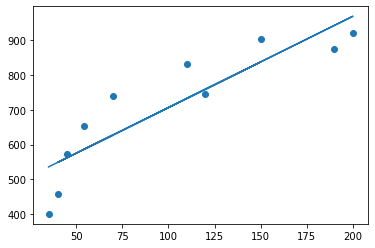

In [570]:
%matplotlib inline
plt.scatter(X,y)
plt.plot(X, 444.1773573243596 + (2.6205388824027653 * X))
plt.show()

In [571]:
mse = ((y - y_hat) ** 2).sum() / n
mse

6470.414201176658

In [572]:
#Матричный метод
#с использованием intercept
X = X.reshape(10,1)
X 

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [573]:
y = y.reshape(10,1)
y 

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

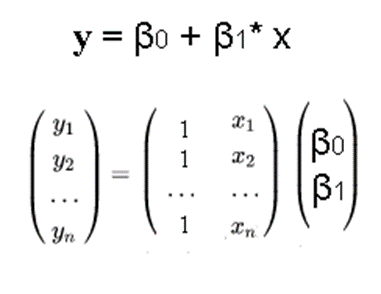
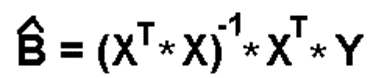

In [574]:
X = np.hstack([np.ones((10,1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [575]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[444.17735732],
       [  2.62053888]])

In [576]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y_hat = 444.17735732 + (2.62053888 * X)
y_hat

array([535.89621812, 562.10160692, 942.07974452, 968.28513332,
       548.99891252, 627.61507892, 585.68645684, 837.25818932,
       758.64202292, 732.43663412])

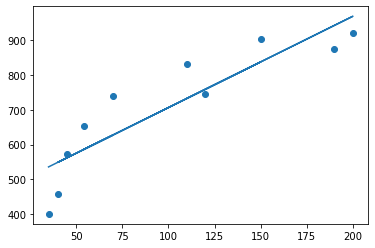

In [577]:
%matplotlib inline
plt.scatter(X,y)
plt.plot(X, 444.17735732 + (2.62053888 * X))
plt.show()

In [578]:
mse = ((y - y_hat) ** 2).sum() / n
mse

6470.414201176658

In [579]:
#Матричный метод
#без intercept

In [580]:
X = X.reshape(10,1)
X 

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [581]:
y = y.reshape(10,1)
y 

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [582]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[5.88982042]])

In [583]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y_hat = 0 + (5.88982042 * X)
y_hat

array([ 206.1437147 ,  265.0419189 , 1119.0658798 , 1177.964084  ,
        235.5928168 ,  412.2874294 ,  318.05030268,  883.473063  ,
        706.7784504 ,  647.8802462 ])

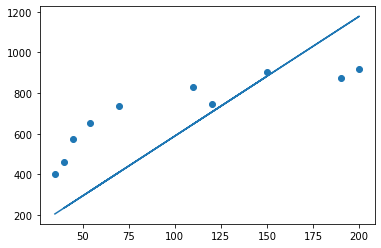

In [584]:
%matplotlib inline
plt.scatter(X,y)
plt.plot(X, 0 + (5.88982042 * X))
plt.show()

In [585]:
mse = ((y - y_hat) ** 2).sum() / n
mse

56516.85841571943

#### Задача 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), 
####  используя градиентный спуск (без intercept).

In [586]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [587]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1 * X - y) ** 2) / n

In [588]:
alpha = 1e-6
alpha

1e-06

In [589]:
B1 = 0.1

In [590]:
n = 10

In [591]:
for i in range(10):
    B1 -= alpha * (2/n) * np.sum((B1 * X - y) * X)
    print('B1={}'.format(B1))

B1=0.25952808
B1=0.414660650906144
B1=0.5655188230595969
B1=0.7122203698240712
B1=0.8548798195302346
B1=0.9936085448867542
B1=1.1285148499277806
B1=1.2597040545647504
B1=1.387278576808517
B1=1.5113380127259965


In [592]:
for i in range(100):
    B1 -= alpha * (2/n) * np.sum((B1 * X - y) * X)
    if i % 10 == 0:
         print('iteration={}, B1={}, mse={}'.format(i, B1, mse_(B1)))      

iteration=0, B1=1.6319792141937546, mse=306275.7568040035
iteration=10, B1=2.6698789606516935, mse=199352.96411174876
iteration=20, B1=3.4547782236263824, mse=138204.25062502263
iteration=30, B1=4.04834889855975, mse=103233.54824312925
iteration=40, B1=4.497229618367758, mse=83233.94472982832
iteration=50, B1=4.836690291080364, mse=71796.25222021657
iteration=60, B1=5.093403362579137, mse=65255.0820486468
iteration=70, B1=5.287539550879594, mse=61514.21323463749
iteration=80, B1=5.434352720103083, mse=59374.825462025976
iteration=90, B1=5.54537842245223, mse=58151.31823171113


In [593]:
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * X - y) * X)
    if i % 500 == 0:
         print('iteration={}, B1={}, mse={}'.format(i, B1, mse_(B1)))     

iteration=0, B1=5.629340281237233, mse=57451.59938606899
iteration=500, B1=5.889820196929507, mse=56516.85841572009
iteration=1000, B1=5.889820420132498, mse=56516.85841571941
iteration=1500, B1=5.889820420132673, mse=56516.85841571943
iteration=2000, B1=5.889820420132673, mse=56516.85841571943
iteration=2500, B1=5.889820420132673, mse=56516.85841571943


In [594]:
mse_(5.889820420132673)

56516.85841571943

#### Задача 3*. Произвести вычисления как в пункте 2, но с вычислением intercept. 
#### Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно 
#### (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [595]:
B0 = 0.1
B1 = 0.1
mse = (1 / n) * np.sum(((B0 + B1 * X) - y) ** 2)
#производная по B1
#derivative for B1
mse_B1 = (2 / n) * np.sum(((B0 + B1 * X) - y) * X)
#производная по B0
#derivative for B0
mse_B0 = (2 / n) * np.sum((B0 + B1 * X) - y)

In [596]:
#can`t make 1e-5, raised error
alpha = 1e-5
alpha

1e-05

In [597]:
def mse_(B1, B0, y=y, X=X, n=10):
    return np.sum(((B0 + B1 * X) - y) ** 2) / n

In [598]:
for i in range(2651000):
    B1 -= alpha * (2 / n) * np.sum(((B0 + B1 * X) - y) * X)
    B0 -= alpha * (2 / n) * np.sum((B0 + B1 * X) - y)
    if i % 50000 == 0:
         print('iteration={}, B1={}, B0={}, mse={}'.format(i, B1, B0, mse_(B1, B0)))  

iteration=0, B1=1.6950780000000003, B0=0.110758381816, mse=298808.8700218417
iteration=50000, B1=5.15665370660389, B0=99.61723711727208, mse=36585.93760739143
iteration=100000, B1=4.588459999872217, B0=176.81283174262413, mse=24603.34326391016
iteration=150000, B1=4.147564980600855, B0=236.71344798806558, mse=17388.475028446403
iteration=200000, B1=3.805448523281312, B0=283.193870141655, mse=13044.313642108338
iteration=250000, B1=3.539980179904944, B0=319.26077193650985, mse=10428.640349866266
iteration=300000, B1=3.3339876302124964, B0=347.2472089095093, mse=8853.71111421085
iteration=350000, B1=3.1741458577845387, B0=368.963536497019, mse=7905.426745257484
iteration=400000, B1=3.0501151962336612, B0=385.8145162892279, mse=7334.452999870819
iteration=450000, B1=2.953872488391512, B0=398.890185681915, mse=6990.6626468980585
iteration=500000, B1=2.879192093262043, B0=409.03636900034104, mse=6783.662223932758
iteration=550000, B1=2.821243168696908, B0=416.9093912403037, mse=6659.0247094

In [599]:
#iteration=2650000, B1=2.620543622476874, B0=444.17671333123707, mse=6470.414201281858

#as result of task_1:
#Bo = 444.1773573243596
#B1 = 2.6205388824027653
#mse 6470.414201176658